In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install py-pde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.0/331.0 kB 5.0 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pde import CartesianGrid, ScalarField, PDEBase, MemoryStorage
from scipy.io import savemat

# Fixed parameters
beta_1 = 1
sigma = 0.2
N = 7
# Fixed eigenvalues for each mode
lambda_val = [0, 0.7091, 2.0567, 3.1134, 4.6842, 5.3759, 6.0607]

# Directory for saving data files and figures
save_dir = '/content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/'
os.makedirs(save_dir, exist_ok=True)

# Number of configurations to generate
num_configs = 10
# Generate 10 beta_2 values evenly spaced between 0 and 2
beta2_values = np.linspace(0.5, 2, num_configs)

config_num = 1
for beta_2 in beta2_values:
    print(f"\n--- Config {config_num}: beta_2 = {beta_2:.3f} ---")

    # Randomly generate threshold values for each mode in this config
    thresholds = np.random.uniform(1, 2, N)

    # Loop over the modes (each mode uses its corresponding eigenvalue and a random threshold)
    for mode_num in range(N):
        theta = beta_1 + lambda_val[mode_num]
        current_threshold = thresholds[mode_num]
        print(f"Config {config_num}, Mode {mode_num}: theta = {theta:.3f}, threshold = {current_threshold:.3f}")

        # Define the PDE for the current mode. Note that beta_2 is taken from the current config.
        class FeynmanKacPDE(PDEBase):
            def __init__(self, theta, sigma, bc='dirichlet'):
                self.theta = theta
                self.sigma = sigma
                self.bc = bc

            def evolution_rate(self, state, t=0):
                state_gradient = state.gradient(bc=self.bc)
                state_laplacian = state.laplace(bc=self.bc)
                x, y = state.grid.cell_coords[..., 0], state.grid.cell_coords[..., 1]

                # Advection in x and y and isotropic diffusion
                advection_x = y * state_gradient[0]
                advection_y = - (self.theta * x + beta_2 * y) * state_gradient[1]
                diffusion = (self.sigma**2 / 2) * state_laplacian
                return advection_x + advection_y + diffusion

        # Create the grid with the domain defined by the current threshold
        grid = CartesianGrid([[-current_threshold, current_threshold],
                              [-current_threshold, current_threshold]], [256, 256])
        # Use a constant initial condition over the grid
        ic = ScalarField(grid, 1)

        # Instantiate the PDE
        pde = FeynmanKacPDE(theta, sigma)
        sampling_interval = 0.1
        storage = MemoryStorage()

        # Solve the PDE for t in [0, 10] with a small timestep
        pde.solve(ic, t_range=10, dt=1e-4, tracker=storage.tracker(sampling_interval))

        # Save the simulation data into a MATLAB file.
        data_filename = os.path.join(
            save_dir,
            f"SafeProb_FK_GeneralGraph_solData_config{config_num}_mode{mode_num}_beta2={beta_2:.2f}_thres={current_threshold:.2f}.mat"
        )
        data_variable_name = f"data_config{config_num}_mode{mode_num}"
        savemat(data_filename, {data_variable_name: np.array(storage.data), 'times': storage.times})
        print(f"Saved data: {data_filename}")

        # (Optional) Plot the solution at selected times and save the plot in PDF format.
        times_to_plot = np.linspace(0, 10, 11)
        fields = []
        for t in times_to_plot:
            closest_index = np.argmin(np.abs(storage.times - t))
            field_data = storage.data[closest_index]
            field = ScalarField(grid, field_data)
            fields.append(field)

        fig, axes = plt.subplots(3, 4, figsize=(16, 12))
        for ax, field, t in zip(axes.flat[:11], fields, times_to_plot):
            field.plot(ax=ax, title=f't = {t:.1f}', vmin=0, vmax=1, cmap='PuBu')
        # Remove any extra subplot
        fig.delaxes(axes.flat[-1])
        plt.tight_layout()

        plot_filename = os.path.join(
            save_dir,
            f"SafeProb_FK_GeneralGraph_Plot_config{config_num}_mode{mode_num}_beta2={beta_2:.2f}_thres={current_threshold:.2f}.pdf"
        )
        plt.savefig(plot_filename)
        plt.close(fig)
        print(f"Saved plot: {plot_filename}")

    config_num += 1



--- Config 1: beta_2 = 0.500 ---
Config 1, Mode 0: theta = 1.000, threshold = 1.998
Saved data: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_solData_config1_mode0_beta2=0.50_thres=2.00.mat
Saved plot: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_Plot_config1_mode0_beta2=0.50_thres=2.00.pdf
Config 1, Mode 1: theta = 1.709, threshold = 1.907
Saved data: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_solData_config1_mode1_beta2=0.50_thres=1.91.mat
Saved plot: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_Plot_config1_mode1_beta2=0.50_thres=1.91.pdf
Config 1, Mode 2: theta = 3.057, threshold = 1.148
Saved data: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_solData_config1_mode2_beta2=0.50_thres=1.15.mat
Saved plot: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_Plot_config1_mode2_be

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pde import CartesianGrid, ScalarField, PDEBase, MemoryStorage
from scipy.io import savemat

# Fixed parameters
beta_1 = 1
sigma = 0.2
N = 7
# Fixed eigenvalues for each mode
lambda_val = [0, 0.7091, 2.0567, 3.1134, 4.6842, 5.3759, 6.0607]

# Directory for saving data files and figures
save_dir = '/content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/'
os.makedirs(save_dir, exist_ok=True)

# Number of configurations to generate (config numbers 0 to 19)
num_configs = 0
# Generate 20 random beta_2 values uniformly distributed between 0.5 and 2
beta2_values = np.random.uniform(0.5, 2, num_configs)

# Start configuration numbering at 10
config_num_start = 20

for i, beta_2 in enumerate(beta2_values):
    config_num = config_num_start + i
    print(f"\n--- Config {config_num}: beta_2 = {beta_2:.3f} ---")

    # Randomly generate threshold values for each mode in this config
    thresholds = np.random.uniform(1, 2, N)

    # Loop over the modes (each mode uses its corresponding eigenvalue and a random threshold)
    for mode_num in range(N):
        theta = beta_1 + lambda_val[mode_num]
        current_threshold = thresholds[mode_num]
        print(f"Config {config_num}, Mode {mode_num}: theta = {theta:.3f}, threshold = {current_threshold:.3f}")

        # Define the PDE for the current mode with beta_2 from the current configuration
        class FeynmanKacPDE(PDEBase):
            def __init__(self, theta, sigma, bc='dirichlet'):
                self.theta = theta
                self.sigma = sigma
                self.bc = bc

            def evolution_rate(self, state, t=0):
                state_gradient = state.gradient(bc=self.bc)
                state_laplacian = state.laplace(bc=self.bc)
                x, y = state.grid.cell_coords[..., 0], state.grid.cell_coords[..., 1]

                # Advection in x and y and isotropic diffusion
                advection_x = y * state_gradient[0]
                advection_y = - (self.theta * x + beta_2 * y) * state_gradient[1]
                diffusion = (self.sigma**2 / 2) * state_laplacian
                return advection_x + advection_y + diffusion

        # Create the grid with the domain defined by the current threshold
        grid = CartesianGrid([[-current_threshold, current_threshold],
                              [-current_threshold, current_threshold]], [256, 256])
        # Use a constant initial condition over the grid
        ic = ScalarField(grid, 1)

        # Instantiate the PDE and prepare the storage for simulation data
        pde = FeynmanKacPDE(theta, sigma)
        sampling_interval = 0.1
        storage = MemoryStorage()

        # Solve the PDE for t in [0, 10] with a small timestep
        pde.solve(ic, t_range=10, dt=1e-4, tracker=storage.tracker(sampling_interval))

        # Save the simulation data into a MATLAB file.
        data_filename = os.path.join(
            save_dir,
            f"SafeProb_FK_GeneralGraph_solData_config{config_num}_mode{mode_num}_beta2={beta_2:.2f}_thres={current_threshold:.2f}.mat"
        )
        data_variable_name = f"data_config{config_num}_mode{mode_num}"
        savemat(data_filename, {data_variable_name: np.array(storage.data), 'times': storage.times})
        print(f"Saved data: {data_filename}")

        # (Optional) Plot the solution at selected times and save the plot in PDF format.
        times_to_plot = np.linspace(0, 10, 11)
        fields = []
        for t in times_to_plot:
            closest_index = np.argmin(np.abs(storage.times - t))
            field_data = storage.data[closest_index]
            field = ScalarField(grid, field_data)
            fields.append(field)

        fig, axes = plt.subplots(3, 4, figsize=(16, 12))
        for ax, field, t in zip(axes.flat[:11], fields, times_to_plot):
            field.plot(ax=ax, title=f't = {t:.1f}', vmin=0, vmax=1, cmap='PuBu')
        # Remove any extra subplot
        fig.delaxes(axes.flat[-1])
        plt.tight_layout()

        plot_filename = os.path.join(
            save_dir,
            f"SafeProb_FK_GeneralGraph_Plot_config{config_num}_mode{mode_num}_beta2={beta_2:.2f}_thres={current_threshold:.2f}.pdf"
        )
        plt.savefig(plot_filename)
        plt.close(fig)
        print(f"Saved plot: {plot_filename}")



--- Config 10: beta_2 = 0.537 ---
Config 10, Mode 0: theta = 1.000, threshold = 1.650
Saved data: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_solData_config10_mode0_beta2=0.54_thres=1.65.mat
Saved plot: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_Plot_config10_mode0_beta2=0.54_thres=1.65.pdf
Config 10, Mode 1: theta = 1.709, threshold = 1.412
Saved data: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_solData_config10_mode1_beta2=0.54_thres=1.41.mat
Saved plot: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_Plot_config10_mode1_beta2=0.54_thres=1.41.pdf
Config 10, Mode 2: theta = 3.057, threshold = 1.753
Saved data: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_solData_config10_mode2_beta2=0.54_thres=1.75.mat
Saved plot: /content/drive/MyDrive/Multi Agent PDE/Data_Beta2_Thres/SafeProb_FK_GeneralGraph_Plot_config1

Test data generation with timer

Processing mode 0 with theta=1
Mode 0: Data generation took 295.47 seconds.


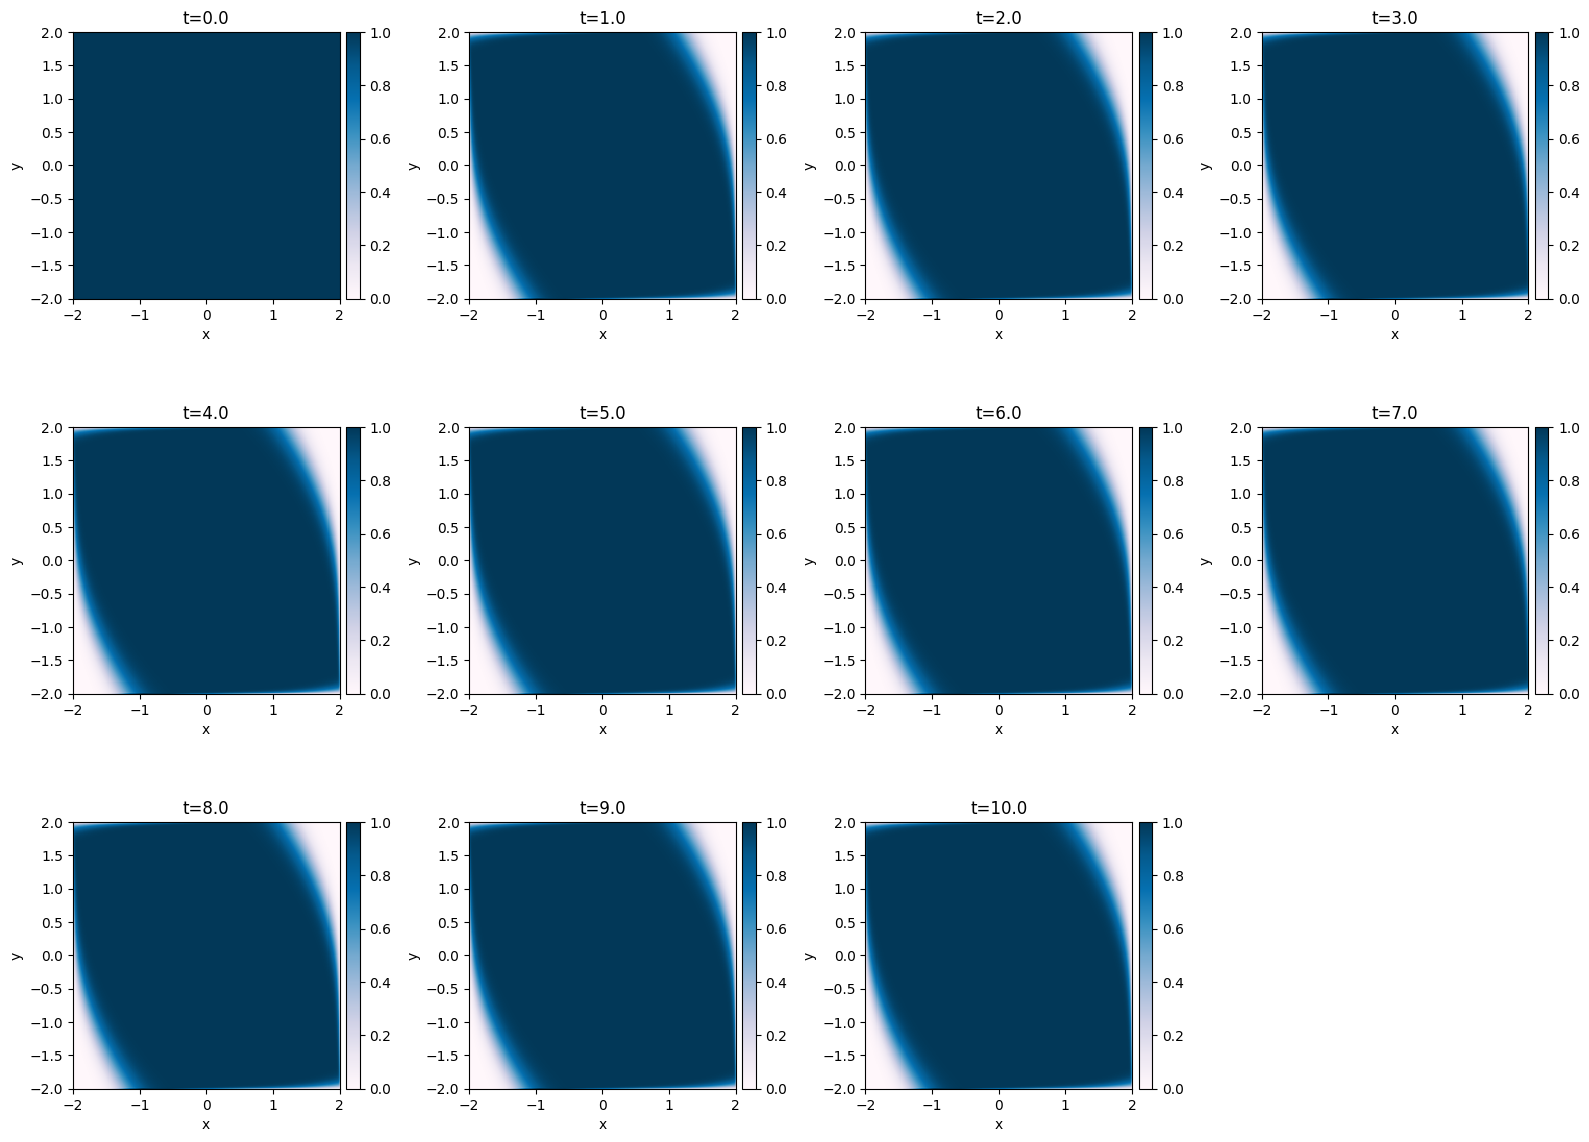

Processing mode 1 with theta=1.7090999999999998
Mode 1: Data generation took 293.53 seconds.


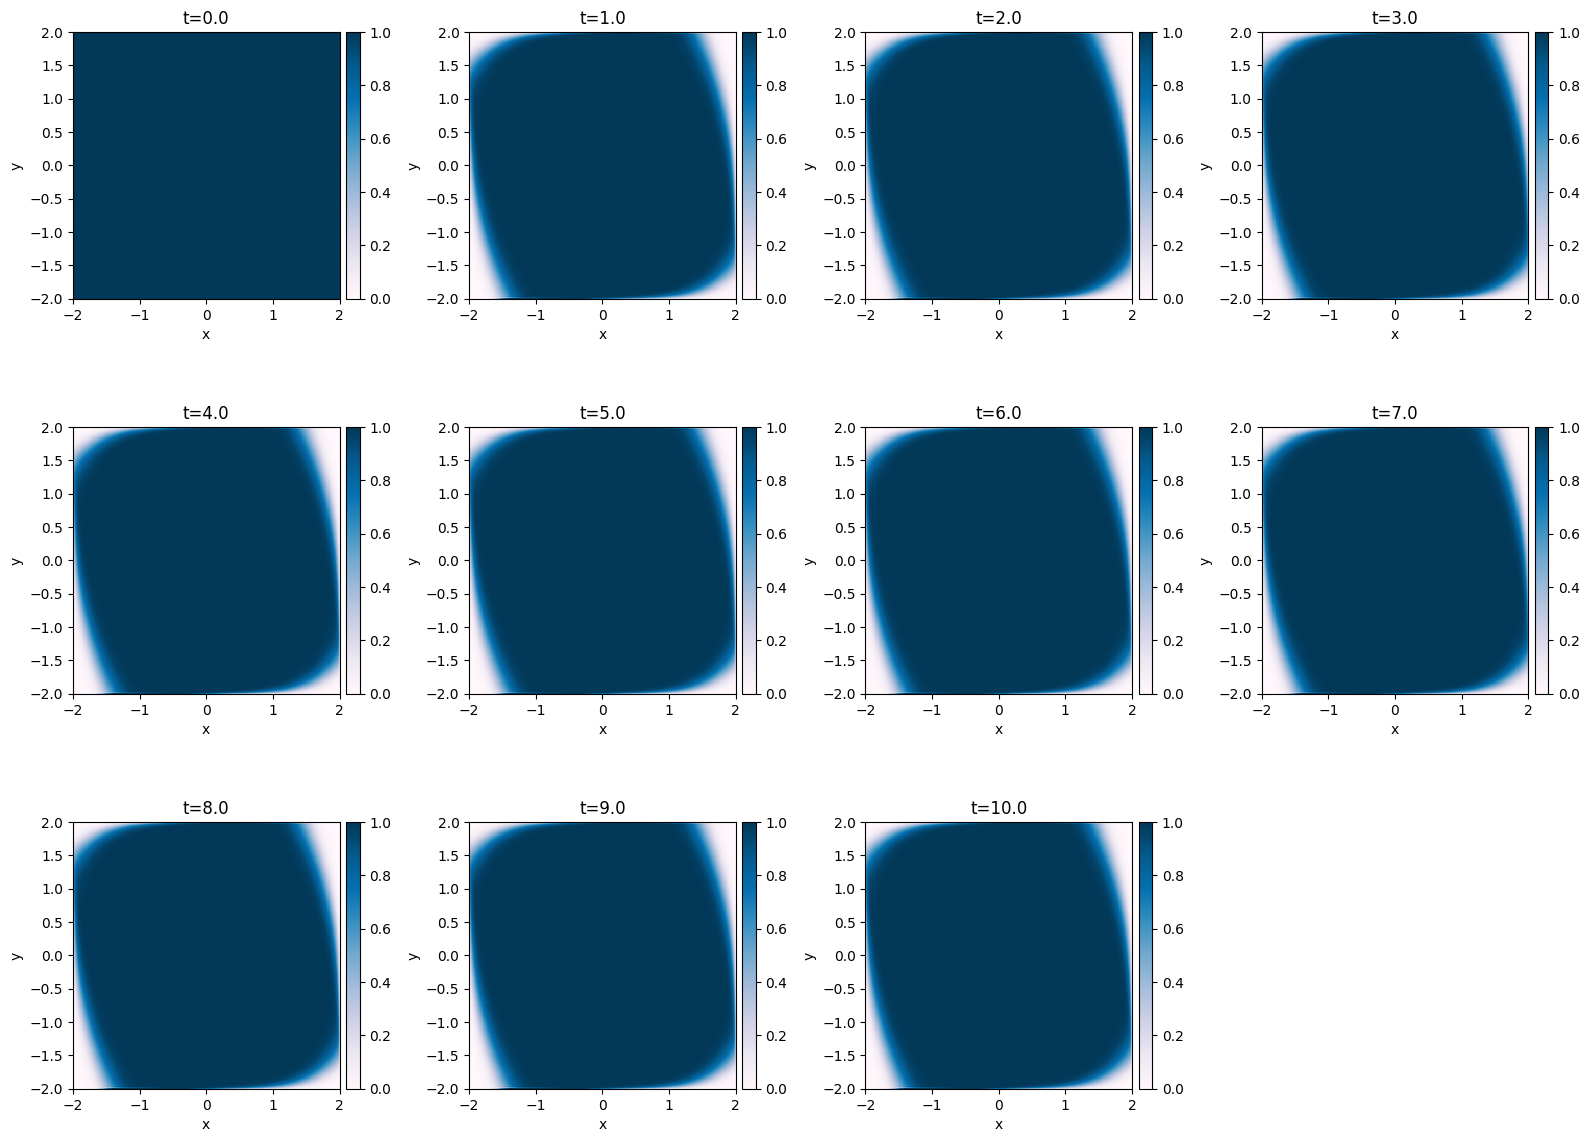

Processing mode 2 with theta=3.0567
Mode 2: Data generation took 293.92 seconds.


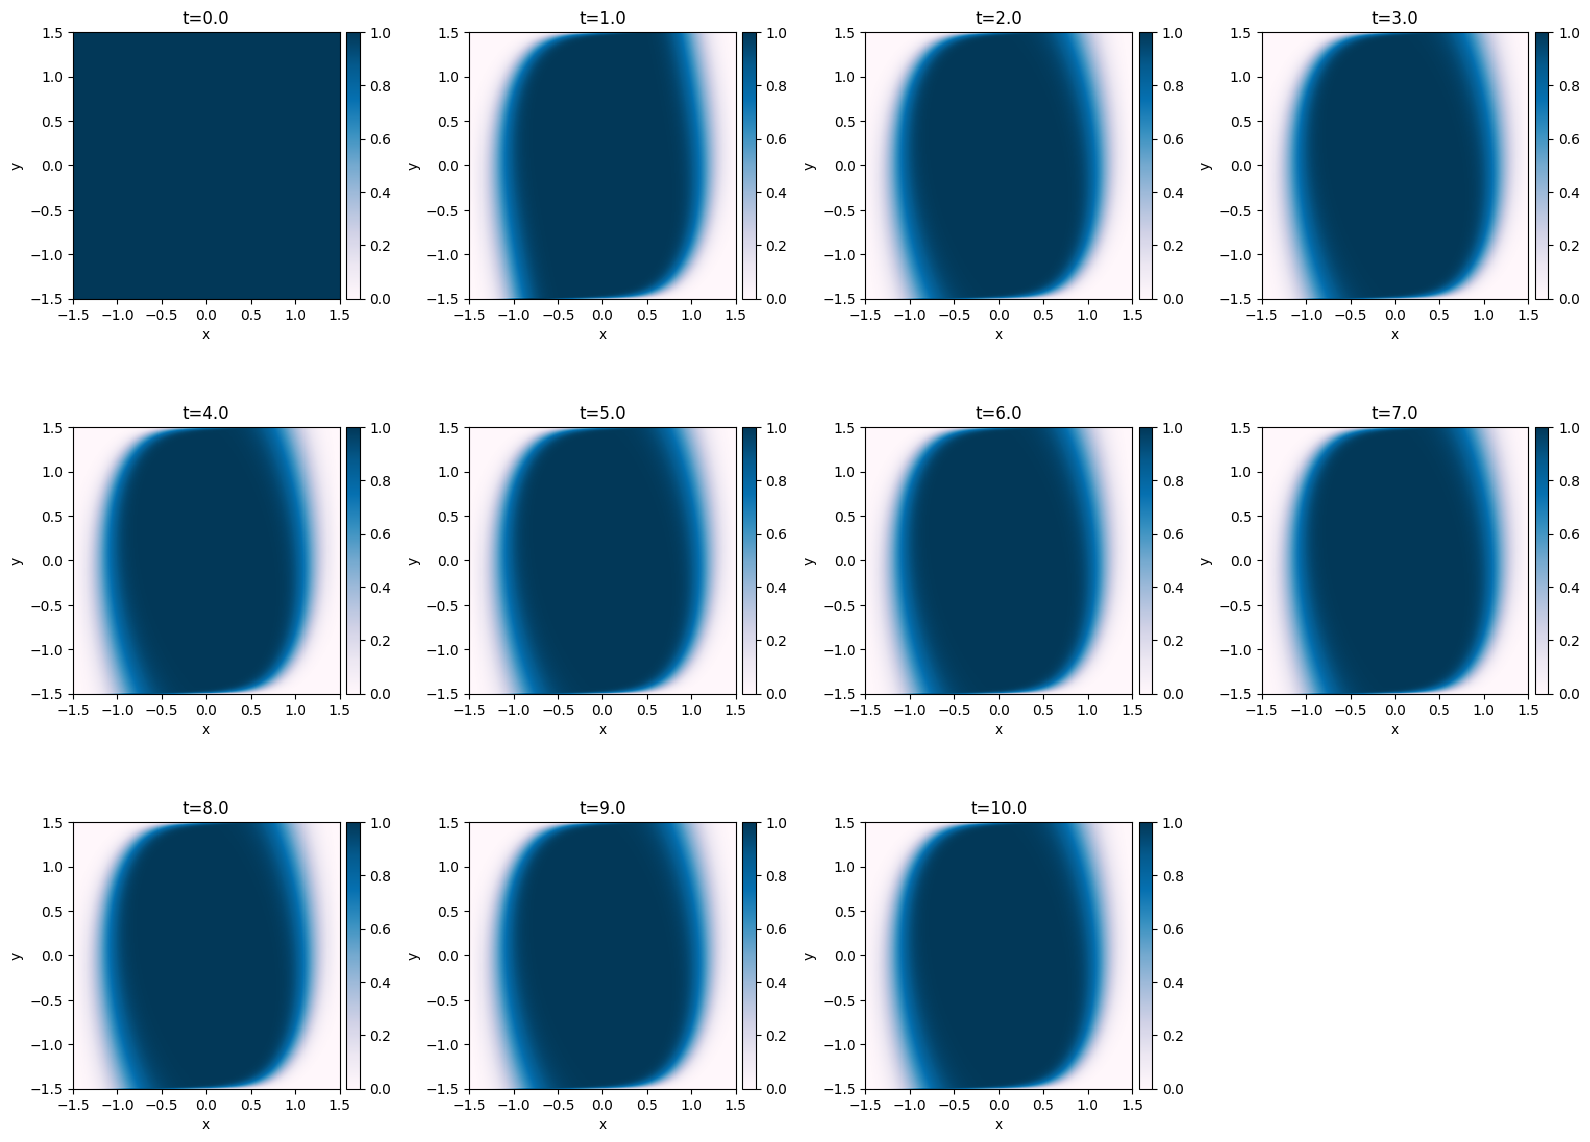

Processing mode 3 with theta=4.1134
Mode 3: Data generation took 291.55 seconds.


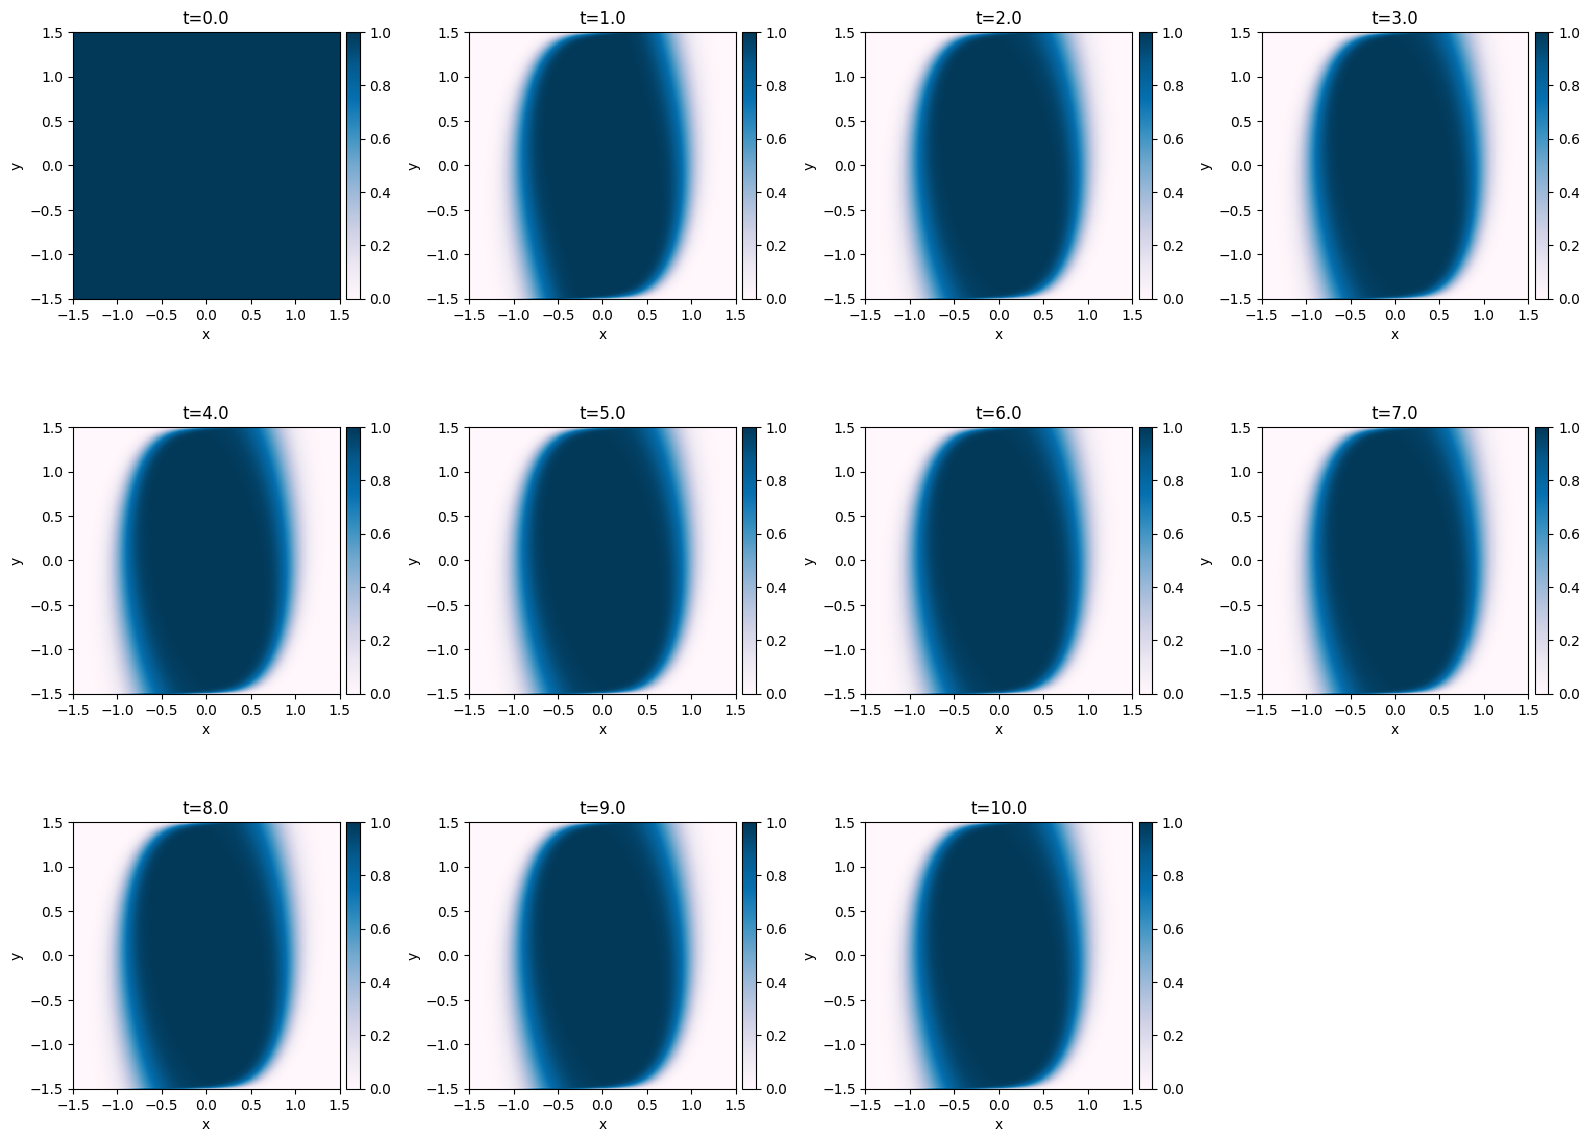

Processing mode 4 with theta=5.6842
Mode 4: Data generation took 292.85 seconds.


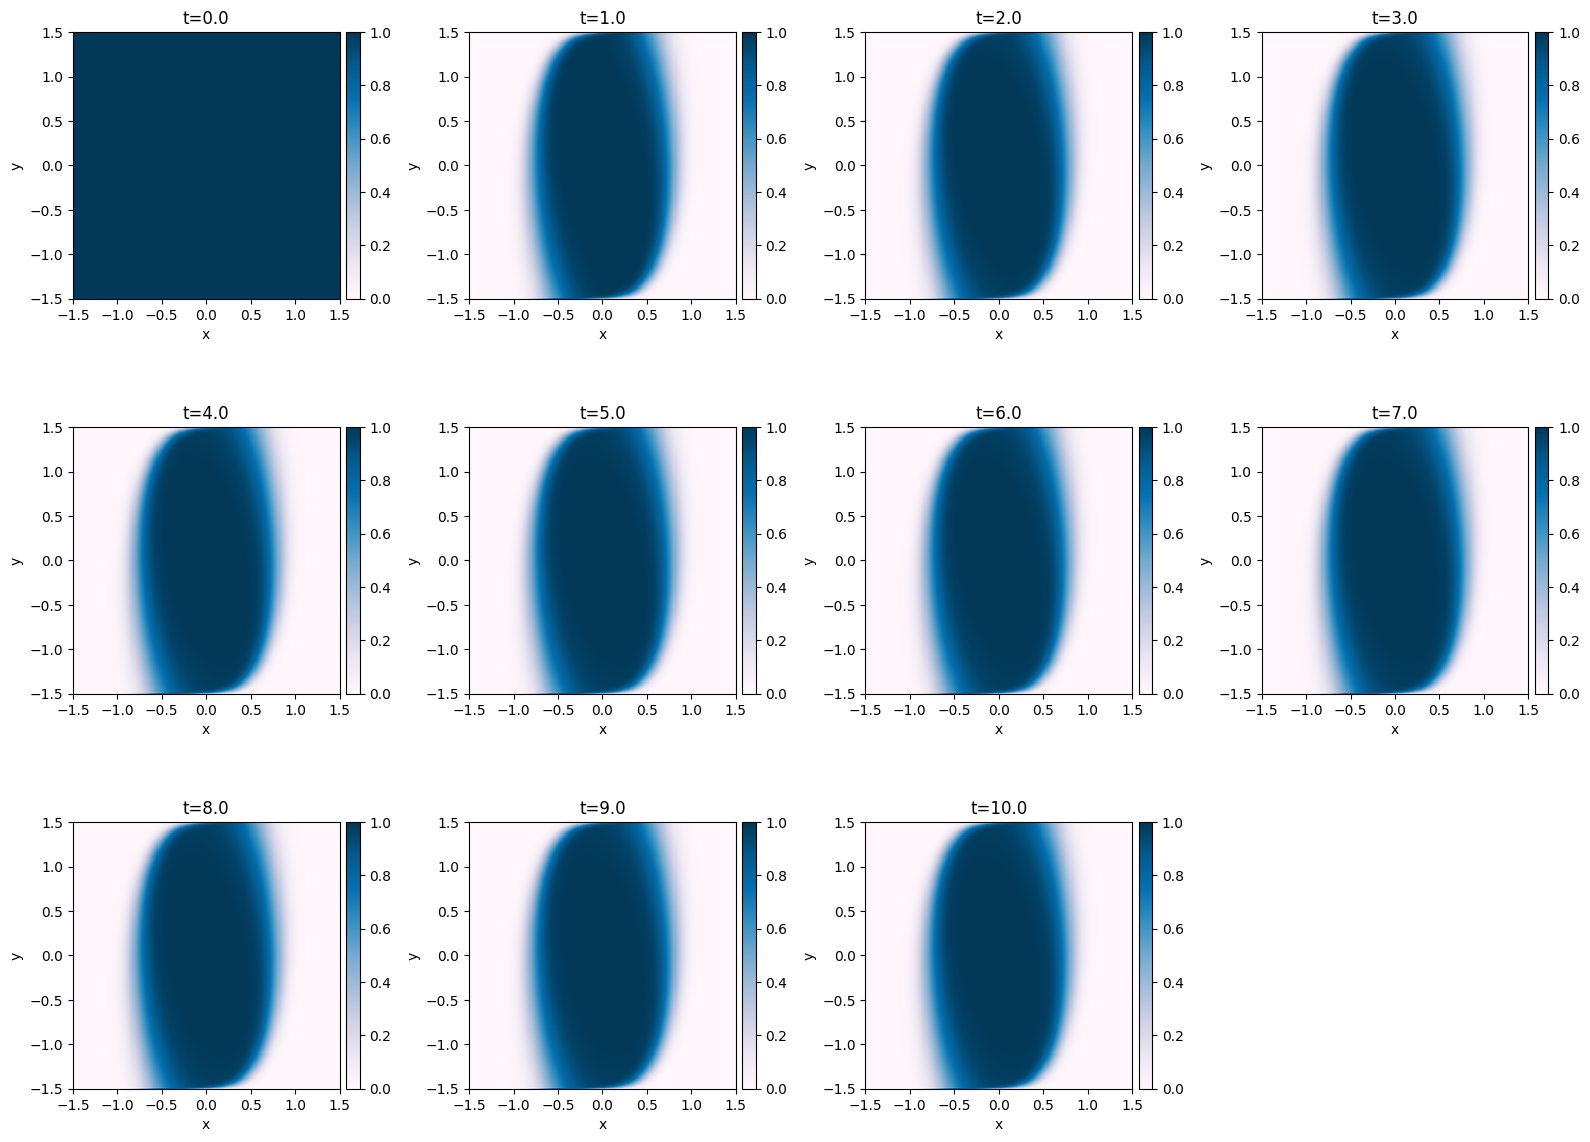

Processing mode 5 with theta=6.3759
Mode 5: Data generation took 288.26 seconds.


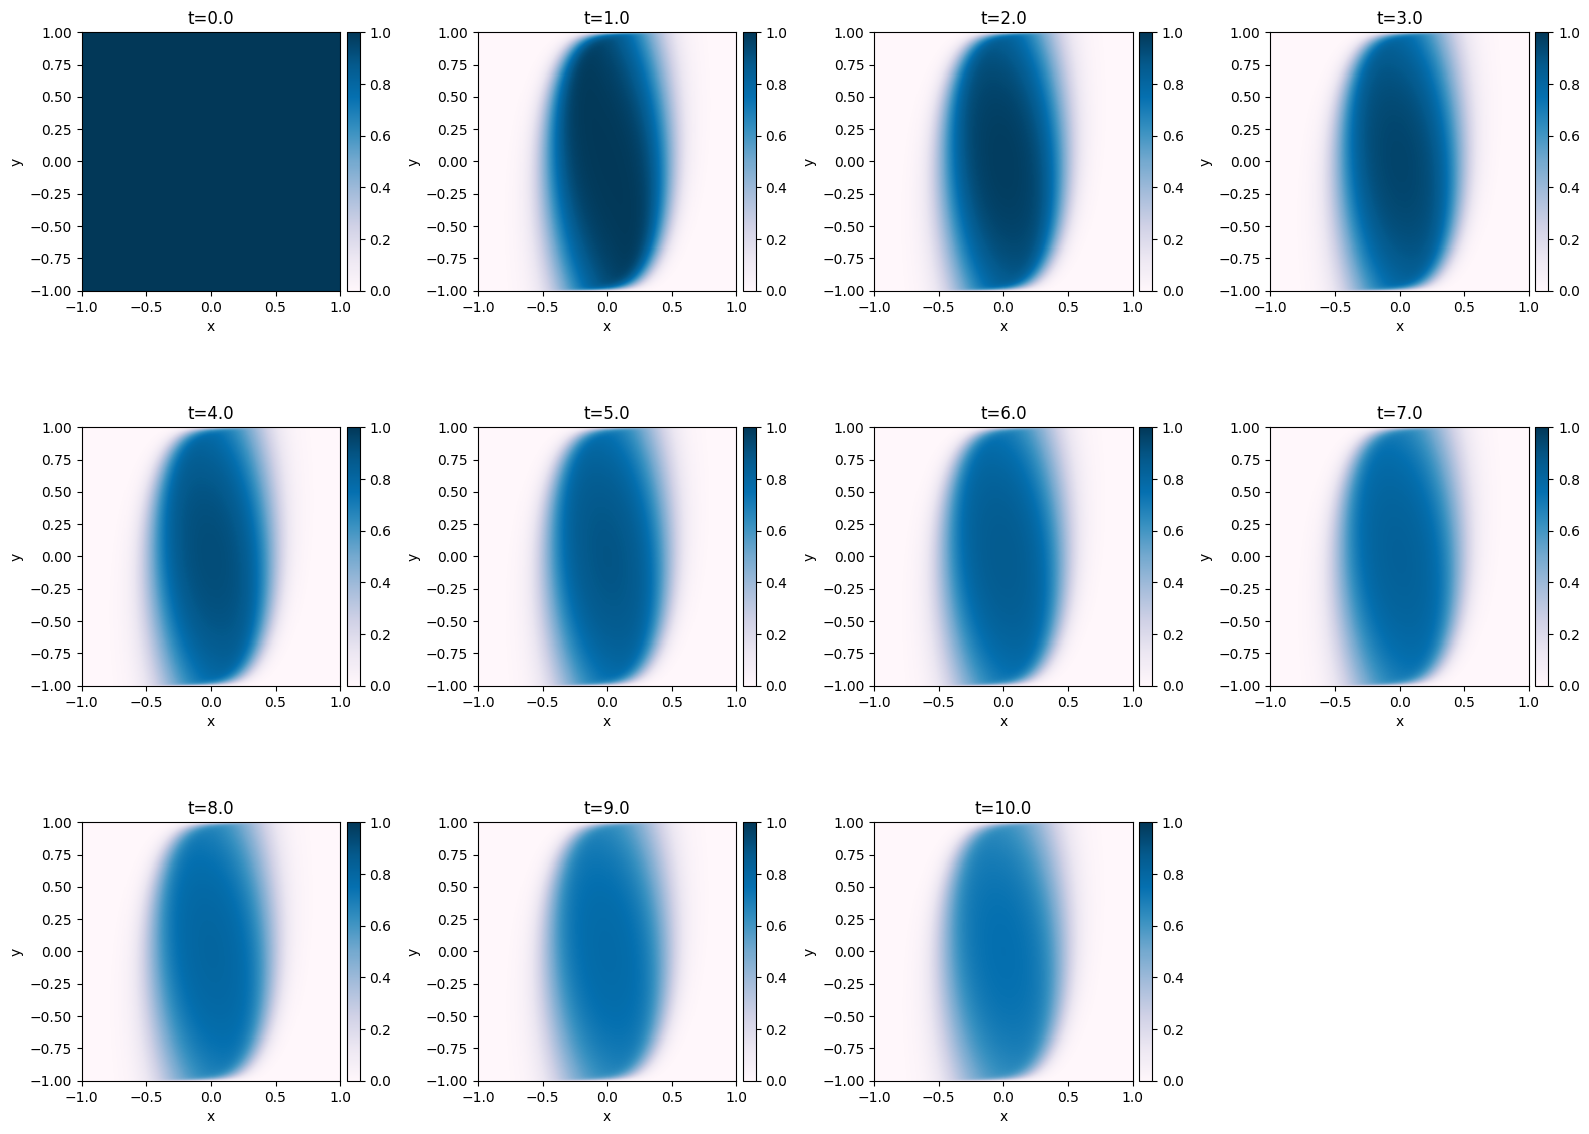

Processing mode 6 with theta=7.0607
Mode 6: Data generation took 291.66 seconds.


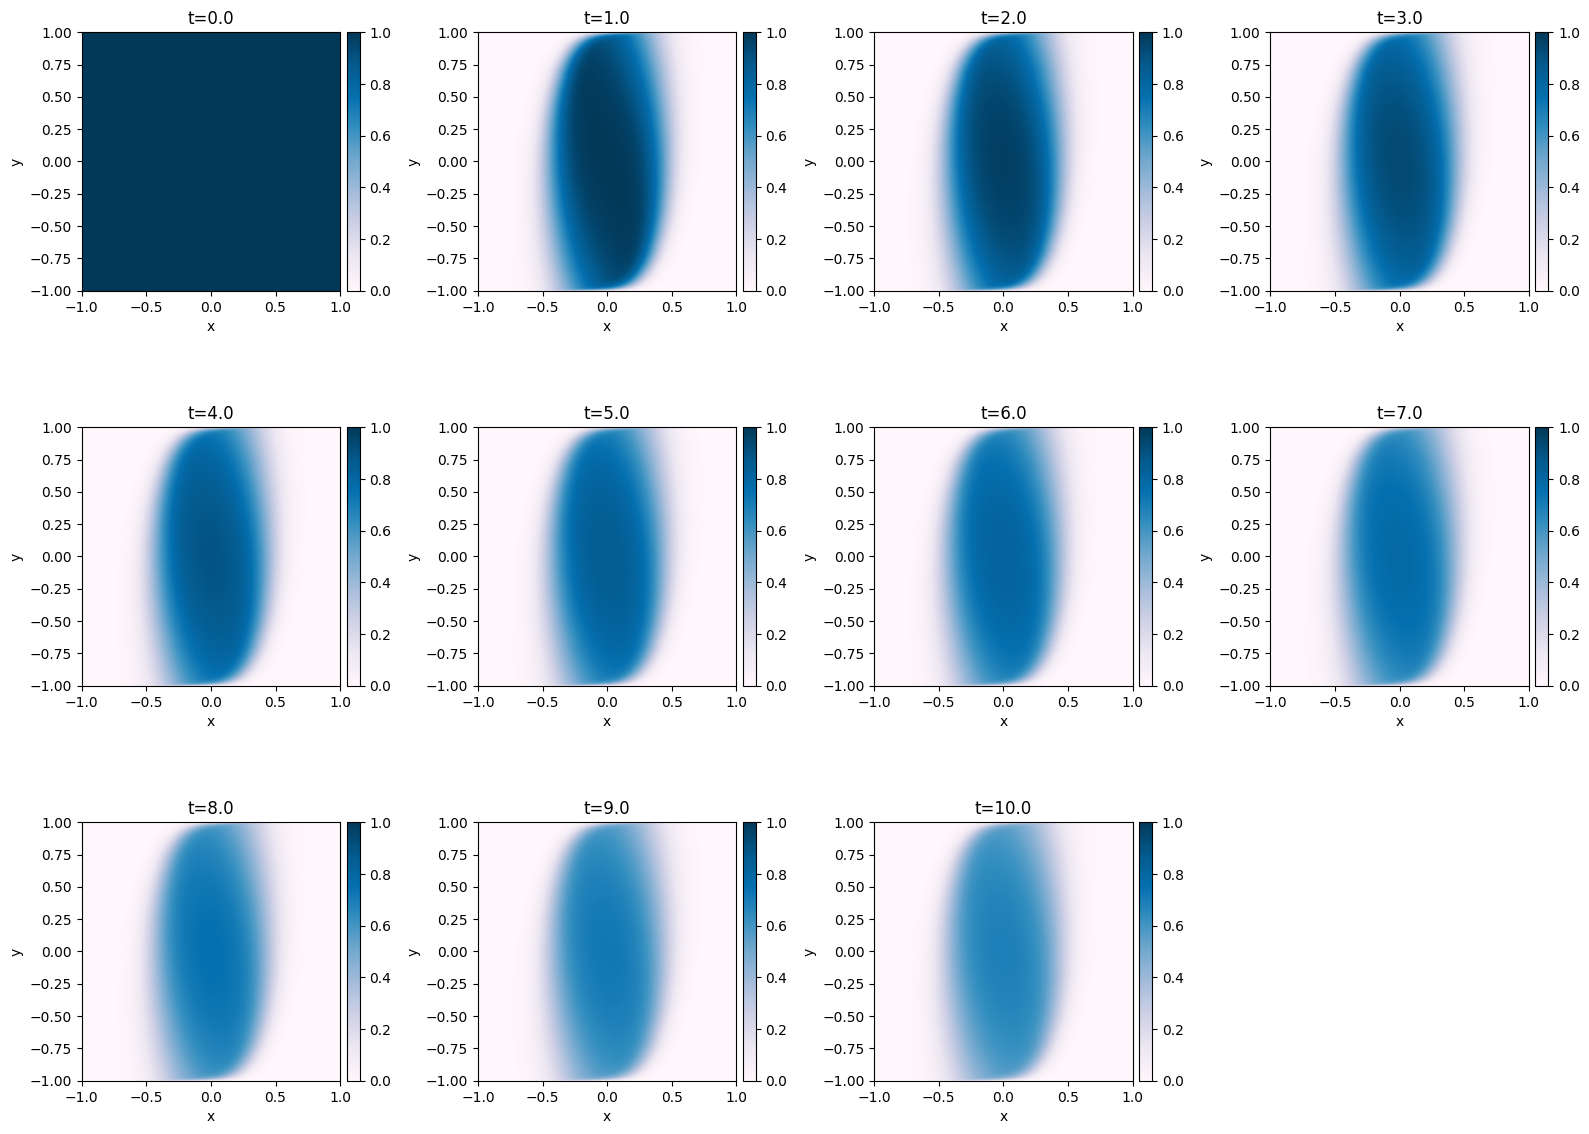

Total time for data generation across all modes: 2079.71 seconds.


In [ ]:
!pip install py-pde

import os
import time  # Imported for timing
import numpy as np
import matplotlib.pyplot as plt
from pde import CartesianGrid, ScalarField, PDEBase, MemoryStorage
from scipy.io import savemat

# Parameters
beta_1 = 1
beta_2 = 1

N = 7
lambda_val = [0, 0.7091, 2.0567, 3.1134, 4.6842, 5.3759, 6.0607]  # Eigenvalues of the Laplacian matrix of the graph laplacian
threshold = [2, 2, 1.5, 1.5, 1.5, 1.0, 1.0]

# Start overall timer
global_start = time.time()

for mode_num in range(N):
    theta = beta_1 + lambda_val[mode_num]
    sigma = 0.2

    print(f"Processing mode {mode_num} with theta={theta}")

    # Define the PDE
    class FeynmanKacPDE(PDEBase):
        def __init__(self, theta, sigma, bc='dirichlet'):
            self.theta = theta
            self.sigma = sigma
            self.bc = bc

        def evolution_rate(self, state, t=0):
            """ evaluate the right-hand side of the PDE """
            state_gradient = state.gradient(bc=self.bc)
            state_laplacian = state.laplace(bc=self.bc)
            x, y = state.grid.cell_coords[..., 0], state.grid.cell_coords[..., 1]

            # Calculate the components
            advection_x = y * state_gradient[0]
            advection_y = - (self.theta * x + beta_2 * y) * state_gradient[1]
            diffusion = (self.sigma**2 / 2) * state_laplacian

            return advection_x + advection_y + diffusion

    # Create the grid
    grid = CartesianGrid([[-threshold[mode_num], threshold[mode_num]],
                            [-threshold[mode_num], threshold[mode_num]]], [256, 256])

    # Initial conditions
    ic = ScalarField(grid, 1)

    # Instantiate the PDE
    pde = FeynmanKacPDE(theta, sigma)

    # Solve the PDE and store the results
    sampling_interval = 0.1
    storage = MemoryStorage()

    # Start timer for data generation (PDE solving)
    start_time = time.time()
    pde.solve(ic, t_range=10, dt=1e-4, tracker=storage.tracker(sampling_interval))
    elapsed_time = time.time() - start_time
    print(f"Mode {mode_num}: Data generation took {elapsed_time:.2f} seconds.")

    # Save the data for MATLAB analysis with labeled filename and variable name
    data_filename = f'SafeProb_FK_GeneralGraph_solData_(lambda_{mode_num},sigma={sigma}).mat'
    data_variable_name = f'data_lambda_{mode_num}'
    savemat(data_filename, {data_variable_name: np.array(storage.data), 'times': storage.times})

    # Extract the stored data for t = 0, 1, 2, ..., 10
    times_to_plot = np.linspace(0, 10, 11)
    fields = []
    for t in times_to_plot:
        # Find the index of the closest time in storage
        closest_index = np.argmin(np.abs(storage.times - t))
        field_data = storage.data[closest_index]
        field = ScalarField(grid, field_data)
        fields.append(field)

    # Plot the results
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    for ax, field, t in zip(axes.flat[:11], fields, times_to_plot):
        field.plot(ax=ax, title=f't={t:.1f}', vmin=0, vmax=1, cmap='PuBu')  # Set colorbar range and colormap

    # Remove the last empty subplot
    fig.delaxes(axes.flat[-1])
    plt.tight_layout()
    plt.show()

    # Create directory for saving figures
    figures_dir = 'Figures_GeneralGraph'
    os.makedirs(figures_dir, exist_ok=True)

    # Save the plots with specified file names
    for t, field in zip(times_to_plot, fields):
        filename = f'{figures_dir}/SafeProb_FK_GeneralGraph_Plot(lambda={lambda_val[mode_num]},sigma={sigma},t={t}).svg'
        fig, ax = plt.subplots()
        field.plot(ax=ax, title=f't={t:.1f}', vmin=0, vmax=1, cmap='PuBu')
        plt.savefig(filename)
        plt.close(fig)

# End overall timer and print total time
global_elapsed = time.time() - global_start
print(f"Total time for data generation across all modes: {global_elapsed:.2f} seconds.")
